In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_csv("ProjectTweets.csv",header = None)

In [3]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
columns_names=['index','id','date','flag','user','text']

In [5]:
df.columns = columns_names

In [6]:
# remove PDT 
df['date'] = df['date'].str.replace('PDT', '')

In [7]:
# time format
date_format = '%a %b %d %H:%M:%S %Y'

In [8]:
# column in object 
df['date'] = pd.to_datetime(df['date'], format=date_format)

In [9]:
# date objects
print(df['date'])

0         2009-04-06 22:19:45
1         2009-04-06 22:19:49
2         2009-04-06 22:19:53
3         2009-04-06 22:19:57
4         2009-04-06 22:19:57
                  ...        
1599995   2009-06-16 08:40:49
1599996   2009-06-16 08:40:49
1599997   2009-06-16 08:40:49
1599998   2009-06-16 08:40:49
1599999   2009-06-16 08:40:50
Name: date, Length: 1600000, dtype: datetime64[ns]


In [10]:
df['date'].min()

Timestamp('2009-04-06 22:19:45')

In [11]:
df['date'].max()

Timestamp('2009-06-25 10:28:31')

In [12]:
df['week'] = df['date'].dt.strftime('%U')  # week



In [13]:
df['month'] = df['date'].dt.strftime('%B')  # month

In [14]:
df['day'] = df['date'].dt.strftime('%A')  # day

In [15]:
df['day_num'] = df['date'].dt.dayofyear


In [16]:
df.head()

,index,id,date,flag,user,text,week,month,day,day_num
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",14,April,Monday,96
1,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,14,April,Monday,96
2,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,14,April,Monday,96
3,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,14,April,Monday,96
4,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",14,April,Monday,96


In [17]:
import nltk
from nltk.tokenize import word_tokenize

In [18]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
english_stopwords = set(stopwords.words('english'))

def clean_data(text, stopwords_set):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords_set]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)


In [25]:
df['cleaned_text'] = df['text'].apply(clean_data, args=(english_stopwords,))


# sentiment analysis with vader

In [21]:
import nltk

In [22]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in df['cleaned_text']:
    pol_score = sia.polarity_scores(line)
    pol_score['cleaned_text'] = line
    results.append(pol_score)

In [27]:
df1 = pd.DataFrame.from_records(results)
df1.head()

,neg,neu,pos,compound,cleaned_text
0,0.224,0.776,0.000,-0.3818,switchfoot http awww bummer shoulda got david ...
1,0.441,0.559,0.000,-0.7269,upset ca update facebook texting might cry res...
2,0.000,0.738,0.262,0.4939,kenichan dived many time ball managed save res...
3,0.450,0.300,0.250,-0.2500,whole body feel itchy like fire
4,0.444,0.556,0.000,-0.4939,nationwideclass behaving mad ca see


In [28]:
df1['label'] = 0
df1.loc[df1['compound'] > 0.2, 'label'] = 1
df1.loc[df1['compound'] < -0.2, 'label'] = -1
df1.head()

,neg,neu,pos,compound,cleaned_text,label
0,0.224,0.776,0.000,-0.3818,switchfoot http awww bummer shoulda got david ...,-1
1,0.441,0.559,0.000,-0.7269,upset ca update facebook texting might cry res...,-1
2,0.000,0.738,0.262,0.4939,kenichan dived many time ball managed save res...,1
3,0.450,0.300,0.250,-0.2500,whole body feel itchy like fire,-1
4,0.444,0.556,0.000,-0.4939,nationwideclass behaving mad ca see,-1


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

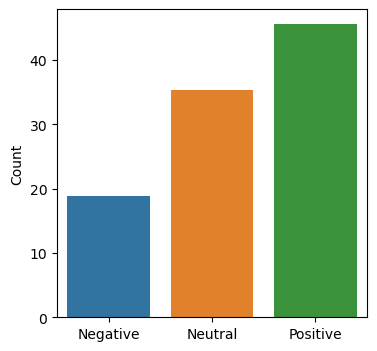

In [30]:
fig, ax = plt.subplots(figsize=(4, 4))

counts = df1.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Count")

plt.show()

In [31]:
merged_df = pd.merge(df, df1, on="cleaned_text", how="inner")

In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13836318 entries, 0 to 13836317
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   index         int64         
 1   id            int64         
 2   date          datetime64[ns]
 3   flag          object        
 4   user          object        
 5   text          object        
 6   week          object        
 7   month         object        
 8   day           object        
 9   day_num       int64         
 10  cleaned_text  object        
 11  neg           float64       
 12  neu           float64       
 13  pos           float64       
 14  compound      float64       
 15  label         int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(7)
memory usage: 1.8+ GB


In [33]:
merged_df['solo_data'] = pd.to_datetime(merged_df['date'])

In [34]:
merged_df['solo_data']= merged_df['solo_data'].dt.date

# sentiment analysis with textblob

In [35]:
from textblob import TextBlob

In [36]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity
    return float(sentiment_score)

In [37]:
df['sentiment_score'] = df['cleaned_text'].apply(analyze_sentiment)

In [38]:
df['label_blob'] = 0
df.loc[df['sentiment_score'] > 0.2, 'label_blob'] = 1
df.loc[df['sentiment_score'] < -0.2, 'label_blob'] = -1
df.head()

,index,id,date,flag,user,text,week,month,day,day_num,cleaned_text,sentiment_score,label_blob
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",14,April,Monday,96,switchfoot http awww bummer shoulda got david ...,0.200,0
1,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,14,April,Monday,96,upset ca update facebook texting might cry res...,0.000,0
2,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,14,April,Monday,96,kenichan dived many time ball managed save res...,0.500,1
3,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,14,April,Monday,96,whole body feel itchy like fire,0.200,0
4,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",14,April,Monday,96,nationwideclass behaving mad ca see,-0.625,-1


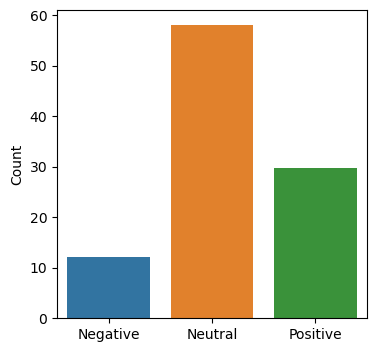

In [39]:
fig, ax = plt.subplots(figsize=(4, 4))

counts = df.label_blob.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Count")

plt.show()

# forecasting models data preparation

In [88]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [89]:
merged_df['solo_data'] = merged_df['date'].dt.date

In [90]:
grouped_df = merged_df.groupby('solo_data')['compound'].mean().reset_index()


In [91]:
grouped_df = grouped_df.dropna()

In [92]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   solo_data  48 non-null     object 
 1   compound   48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


In [93]:
grouped_df['solo_data'] = pd.to_datetime(grouped_df['solo_data'], format='%Y-%m-%d')

In [94]:
grouped_df['day_num'] = grouped_df['solo_data'].dt.dayofyear

In [95]:
grouped_df1 = grouped_df[grouped_df['solo_data'].dt.month >= 5]

In [96]:
plt.figure(figsize=(10, 6))  # chart


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

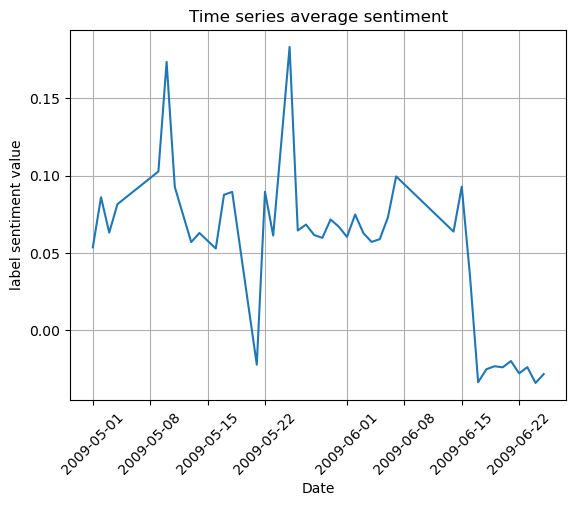

In [97]:
plt.plot(grouped_df1['solo_data'], grouped_df1['compound'])  
plt.title('Time series average sentiment')  
plt.xlabel('Date')  
plt.ylabel('label sentiment value')  
plt.grid(True) 
plt.xticks(rotation=45)
plt.show()  

In [98]:
from statsmodels.tsa.stattools import adfuller

# test ADF
result = adfuller(grouped_df1['compound'])

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]






time series is not stationary (H1 accepted)


In [108]:
if p_value < 0.05:
    print("time series is stationary (Ho rejected)")
else:
    print("time series is not stationary (H1 accepted)")


time series is not stationary (H1 accepted)


# investigation on negative peak 21st of May¶

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer



In [ ]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [40]:
twenty_first_may = merged_df[(merged_df['solo_data'] == pd.to_datetime('2009-05-21'))]

/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_790/2057111120.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  twenty_first_may = merged_df[(merged_df['solo_data'] == pd.to_datetime('2009-05-21'))]


In [62]:
twenty_first_may.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33004 entries, 575494 to 13010863
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         33004 non-null  int64         
 1   id            33004 non-null  int64         
 2   date          33004 non-null  datetime64[ns]
 3   flag          33004 non-null  object        
 4   user          33004 non-null  object        
 5   text          33004 non-null  object        
 6   week          33004 non-null  object        
 7   month         33004 non-null  object        
 8   day           33004 non-null  object        
 9   day_num       33004 non-null  int64         
 10  cleaned_text  33004 non-null  object        
 11  neg           33004 non-null  float64       
 12  neu           33004 non-null  float64       
 13  pos           33004 non-null  float64       
 14  compound      33004 non-null  float64       
 15  label         33004 non-null

In [52]:
def clean2(text):
    
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

In [50]:
twenty_first_may['text']=twenty_first_may['text'].astype('string')

/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_790/1369968564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_first_may['text']=twenty_first_may['text'].astype('string')


In [53]:
twenty_first_may['text'] = twenty_first_may['text'].apply(clean2)

/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_790/1742615297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_first_may['text'] = twenty_first_may['text'].apply(clean2)


In [63]:

vec = CountVectorizer()  #  CountVectorizer
X = vec.fit_transform([' '.join(text) for text in twenty_first_may['text']])
df_words_f = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())



In [64]:
# 10 most frequent words
word_sum = df_words.sum().sort_values(ascending=False)
print(word_sum.head(10))

sorry       2333
died        2313
isplayer    2310
thank       1228
tired        774
bed          233
nothing      226
good         213
ca           210
going        205
dtype: int64


In [81]:
df_filtrato = twenty_first_may[twenty_first_may['cleaned_text'].str.contains('died', case=False, na=False)]

In [82]:
df_filtrato['cleaned_text'].unique()

array(['isplayer died sorry',
       'found friend brother died funeral tuesday another friend lost mom mother day',
       'rocky start summer cat max died',
       'supersweetmack oh sorry thats kind fault show ended super early amp take back car amp phone died'],
      dtype=object)

# investigation on positive peak 21st of May

In [65]:
twenty_fifth_may = merged_df[(merged_df['solo_data'] == pd.to_datetime('2009-05-25'))]

/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_790/4066597930.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  twenty_fifth_may = merged_df[(merged_df['solo_data'] == pd.to_datetime('2009-05-25'))]


In [66]:
twenty_fifth_may['text']=twenty_fifth_may['text'].astype('string')

/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_790/1856623546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_fifth_may['text']=twenty_fifth_may['text'].astype('string')


In [69]:
twenty_fifth_may['text'] = twenty_fifth_may['text'].apply(clean2)

/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_790/3468761305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_fifth_may['text'] = twenty_fifth_may['text'].apply(clean2)


In [70]:
# CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform([' '.join(text) for text in twenty_fifth_may['text']])
df_words = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())



In [72]:
word_sum = df_words.sum().sort_values(ascending=False)
print(word_sum.head(10))

bored      247
welcome    215
time        91
good        90
like        87
follow      84
laugh       83
simple      81
online      32
back        17
dtype: int64


In [78]:
df_filtrato = twenty_fifth_may[twenty_fifth_may['cleaned_text'].str.contains('welcome', case=False, na=False)]

In [80]:
df_filtrato['cleaned_text'].unique()

array(['pathfindersar welcome anything help sock thing im paranoid confess',
       'welcome'], dtype=object)

# Models

# fill null values in dates column

In [109]:
import numpy as np

In [111]:
grouped_df1.reset_index(inplace=True)

In [112]:
dates = np.array(grouped_df1['solo_data'])  


In [113]:
values = np.array(grouped_df1['compound'])  

In [114]:
numeric_dates = np.arange(len(dates))


In [116]:
date_min = min(grouped_df1['solo_data'])
date_max = max(grouped_df1['solo_data'])

In [117]:
list_dates = grouped_df1['solo_data'].tolist()

In [118]:
from datetime import datetime, timedelta

delta = date_max - date_min

# Crea una lista di date nel periodo
date_list = [date_min + timedelta(days=i) for i in range(delta.days + 1)]

# Stampa la lista di date
print(date_list)


[Timestamp('2009-05-01 00:00:00'), Timestamp('2009-05-02 00:00:00'), Timestamp('2009-05-03 00:00:00'), Timestamp('2009-05-04 00:00:00'), Timestamp('2009-05-05 00:00:00'), Timestamp('2009-05-06 00:00:00'), Timestamp('2009-05-07 00:00:00'), Timestamp('2009-05-08 00:00:00'), Timestamp('2009-05-09 00:00:00'), Timestamp('2009-05-10 00:00:00'), Timestamp('2009-05-11 00:00:00'), Timestamp('2009-05-12 00:00:00'), Timestamp('2009-05-13 00:00:00'), Timestamp('2009-05-14 00:00:00'), Timestamp('2009-05-15 00:00:00'), Timestamp('2009-05-16 00:00:00'), Timestamp('2009-05-17 00:00:00'), Timestamp('2009-05-18 00:00:00'), Timestamp('2009-05-19 00:00:00'), Timestamp('2009-05-20 00:00:00'), Timestamp('2009-05-21 00:00:00'), Timestamp('2009-05-22 00:00:00'), Timestamp('2009-05-23 00:00:00'), Timestamp('2009-05-24 00:00:00'), Timestamp('2009-05-25 00:00:00'), Timestamp('2009-05-26 00:00:00'), Timestamp('2009-05-27 00:00:00'), Timestamp('2009-05-28 00:00:00'), Timestamp('2009-05-29 00:00:00'), Timestamp('20

In [119]:
list_dates

[Timestamp('2009-05-01 00:00:00'),
 Timestamp('2009-05-02 00:00:00'),
 Timestamp('2009-05-03 00:00:00'),
 Timestamp('2009-05-04 00:00:00'),
 Timestamp('2009-05-09 00:00:00'),
 Timestamp('2009-05-10 00:00:00'),
 Timestamp('2009-05-11 00:00:00'),
 Timestamp('2009-05-13 00:00:00'),
 Timestamp('2009-05-14 00:00:00'),
 Timestamp('2009-05-16 00:00:00'),
 Timestamp('2009-05-17 00:00:00'),
 Timestamp('2009-05-18 00:00:00'),
 Timestamp('2009-05-21 00:00:00'),
 Timestamp('2009-05-22 00:00:00'),
 Timestamp('2009-05-23 00:00:00'),
 Timestamp('2009-05-25 00:00:00'),
 Timestamp('2009-05-26 00:00:00'),
 Timestamp('2009-05-27 00:00:00'),
 Timestamp('2009-05-28 00:00:00'),
 Timestamp('2009-05-29 00:00:00'),
 Timestamp('2009-05-30 00:00:00'),
 Timestamp('2009-05-31 00:00:00'),
 Timestamp('2009-06-01 00:00:00'),
 Timestamp('2009-06-02 00:00:00'),
 Timestamp('2009-06-03 00:00:00'),
 Timestamp('2009-06-04 00:00:00'),
 Timestamp('2009-06-05 00:00:00'),
 Timestamp('2009-06-06 00:00:00'),
 Timestamp('2009-06-

In [120]:
valori_mancanti = list(set(date_list) - set(list_dates))

print(valori_mancanti)

[Timestamp('2009-05-06 00:00:00'), Timestamp('2009-05-05 00:00:00'), Timestamp('2009-06-08 00:00:00'), Timestamp('2009-06-11 00:00:00'), Timestamp('2009-05-08 00:00:00'), Timestamp('2009-05-20 00:00:00'), Timestamp('2009-06-10 00:00:00'), Timestamp('2009-05-07 00:00:00'), Timestamp('2009-06-09 00:00:00'), Timestamp('2009-05-15 00:00:00'), Timestamp('2009-05-19 00:00:00'), Timestamp('2009-05-24 00:00:00'), Timestamp('2009-06-12 00:00:00'), Timestamp('2009-05-12 00:00:00'), Timestamp('2009-06-13 00:00:00')]


In [121]:
df5 = pd.DataFrame({'solo_data': valori_mancanti})


In [122]:
df5['compound']= ' '

In [123]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  15 non-null     datetime64[ns]
 1   compound   15 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 368.0+ bytes


In [124]:
df5['solo_data'] = pd.to_datetime(df5['solo_data'])

In [125]:
df5 = df5.sort_values(by='solo_data')

In [126]:
grouped_df1

,solo_data,compound,day_num
0,2009-05-01,0.053553,121
1,2009-05-02,0.085993,122
2,2009-05-03,0.063115,123
3,2009-05-04,0.081469,124
4,2009-05-09,0.102651,129
5,2009-05-10,0.173558,130
6,2009-05-11,0.092621,131
7,2009-05-13,0.056954,133
8,2009-05-14,0.062869,134
9,2009-05-16,0.052799,136


In [127]:
df5['compound'].replace(' ', pd.NA, inplace=True)

In [128]:
df_concatenato = pd.concat([grouped_df1, df5], axis=0)

In [129]:
df_concatenato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 14
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  56 non-null     datetime64[ns]
 1   compound   41 non-null     float64       
 2   day_num    41 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.8 KB


In [130]:
df_concatenato['solo_data'] = pd.to_datetime(df_concatenato['solo_data'])

In [131]:
df_concatenato['day_num'] = df_concatenato['solo_data'].dt.dayofyear

In [132]:
df_concatenato = df_concatenato.sort_values(by='solo_data')

In [133]:
df_concatenato.sort_values(by="solo_data", inplace=True)



In [134]:
df_concatenato['compound'] = df_concatenato['compound'].replace(' ', np.nan)



In [137]:
df_concatenato["compound"].fillna(method='ffill', inplace=True) # Forward Fill to column "compound"

In [138]:
df_concatenato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 40
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  56 non-null     datetime64[ns]
 1   compound   56 non-null     float64       
 2   day_num    56 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.8 KB


In [139]:

df_concatenato = df_concatenato.set_index('solo_data')

In [170]:
from scipy.stats import shapiro
stat, p = shapiro(df_concatenato["compound"])


In [171]:
p

7.621965323778568e-06

# decompose the time series

In [140]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [145]:
decomposition = seasonal_decompose(df_concatenato['compound'], model='additive')

In [142]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

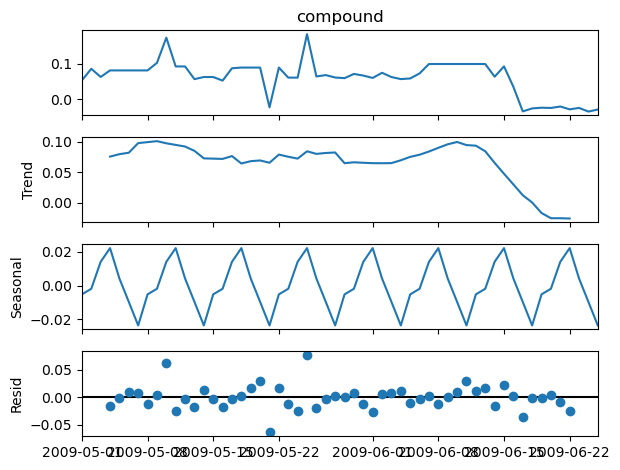

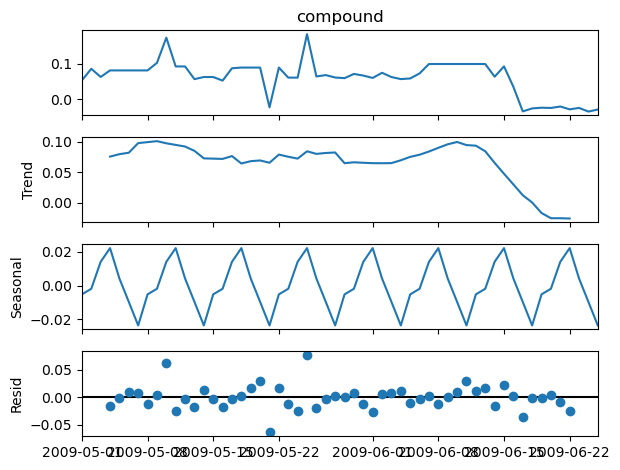

In [143]:
decomposition.plot()

In [163]:
df_diff = df_concatenato['compound'].diff().dropna()

In [151]:
df_diff.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 55 entries, 2009-05-02 to 2009-06-25
Series name: compound
Non-Null Count  Dtype  
--------------  -----  
55 non-null     float64
dtypes: float64(1)
memory usage: 880.0 bytes


In [152]:
from statsmodels.tsa.stattools import adfuller

# test ADF
result = adfuller(df_diff)

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

In [153]:
if p_value < 0.05:
    print("time series is stationary (Ho rejected)")
else:
    print("time series is not stationary (H1 accepted)")


time series is stationary (Ho rejected)


# normalize data

In [154]:
from sklearn.preprocessing import MinMaxScaler

In [161]:
scaler = MinMaxScaler()


In [164]:
date_index = df_diff.index



In [331]:
df_diff_scaled = scaler.fit_transform(df_diff.values.reshape(-1, 1))

In [332]:
df_diff_scaled = pd.Series(df_diff_scaled.flatten(), index=date_index)

In [333]:
test_set_start_index = len(df_diff_scaled) - 7

# split dataset into training and test set
train_set = df_diff.iloc[:test_set_start_index]
test_set= df_diff.iloc[test_set_start_index:]

In [334]:
test_set

solo_data
2009-06-19    0.001969
2009-06-20   -0.000683
2009-06-21    0.004045
2009-06-22   -0.007981
2009-06-23    0.004030
2009-06-24   -0.010207
2009-06-25    0.005708
Name: compound, dtype: float64

# arima

In [335]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import GridSearchCV
from pmdarima import auto_arima


In [336]:
p_values = range(0, 3)  # Range per p
q_values = range(0, 3) 
d_values = range(0, 3)
# Range per q

In [337]:
grid_search =  auto_arima(train_set, # grid search using auto_arima
                        start_p=min(p_values),
                        start_q=min(q_values),
                        max_p=max(p_values),
                        max_q=max(q_values),
                        d=1,
                        seasonal=False,  # ARIMA non stagionale
                        stepwise=True,  # Esecuzione passo-passo
                        suppress_warnings=True,  # Nascondi avvisi
                        error_action="ignore",  # Ignora errori
                        trace=True)  # Mostra il percorso della ricerca




Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-111.269, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-136.024, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-113.266, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-156.434, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-158.247, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-138.001, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-163.194, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-164.337, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-162.698, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-163.530, Time=0.11 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total 

In [338]:
model = ARIMA(train_set, order=(2, 1, 2))


/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [339]:
model_fit = model.fit()



/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [340]:
predictions = model_fit.forecast(7)

In [341]:
predictions

2009-06-19   -0.007977
2009-06-20   -0.004062
2009-06-21   -0.000431
2009-06-22   -0.006450
2009-06-23   -0.001448
2009-06-24   -0.004129
2009-06-25   -0.003565
Freq: D, Name: predicted_mean, dtype: float64

In [342]:
test_set

solo_data
2009-06-19    0.001969
2009-06-20   -0.000683
2009-06-21    0.004045
2009-06-22   -0.007981
2009-06-23    0.004030
2009-06-24   -0.010207
2009-06-25    0.005708
Name: compound, dtype: float64

In [343]:
import matplotlib.pyplot as plt


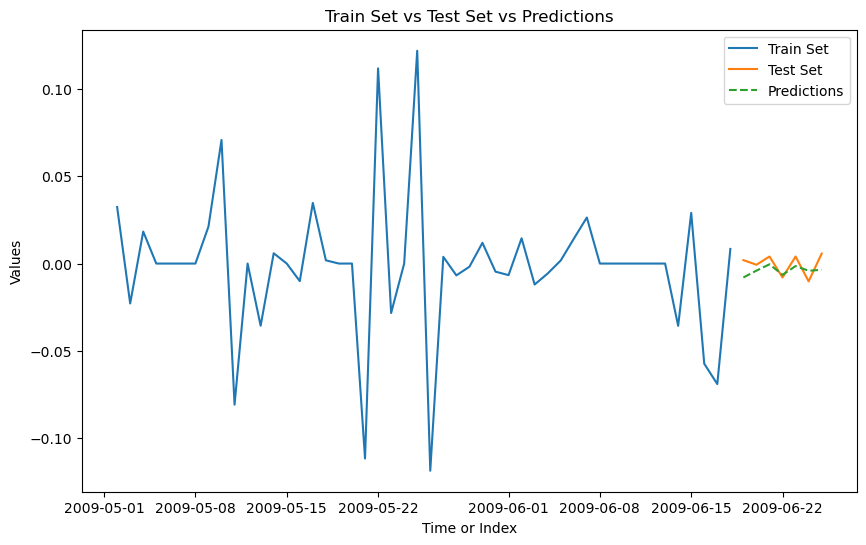

In [344]:
plt.figure(figsize=(10,6))

# plot train set vs test set and vs predicted values
plt.plot(train_set, label='Train Set')
plt.plot(test_set, label='Test Set')
plt.plot(predictions, label='Predictions', linestyle='--')

# titles and labels
plt.title('Train Set vs Test Set vs Predictions')
plt.xlabel('Time or Index')
plt.ylabel('Values')


plt.legend()
plt.show()


In [345]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set, predictions)

212.5537171929769

In [346]:
model2 = ARIMA(df_diff_scaled, order=(2, 1, 2))

/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [347]:
model_fit = model2.fit()

In [348]:
one_week_forecast = model_fit.forecast(steps=7)
one_month_forecast = model_fit.forecast(steps=30)
three_months_forecast = model_fit.forecast(steps=90)

<Axes: >

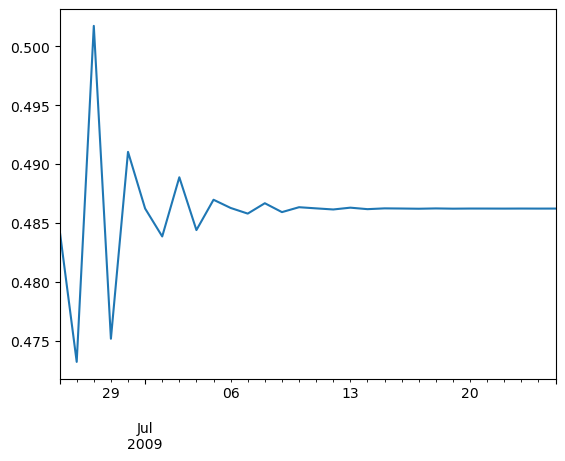

In [349]:
one_month_forecast.plot()

<Axes: >

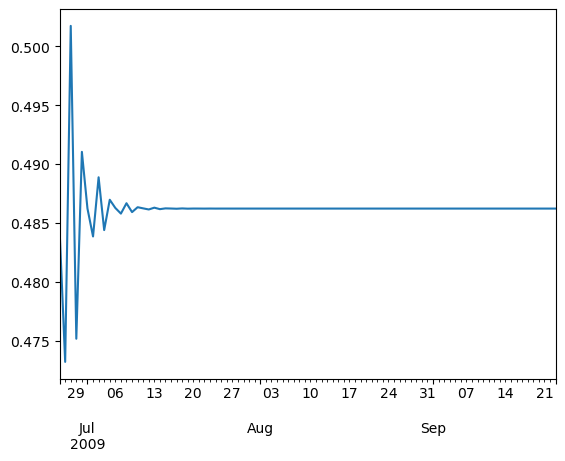

In [350]:
three_months_forecast.plot()

In [353]:
df_diff_scaled2= df_diff_scaled.reset_index()

In [361]:
df_diff_scaled2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      55 non-null     datetime64[ns]
 1   compound  55 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1008.0 bytes


In [360]:
df_diff_scaled2.columns = ['date','compound']


In [362]:
type(three_months_forecast)

pandas.core.series.Series

In [363]:
actual_predictions = three_months_forecast.values

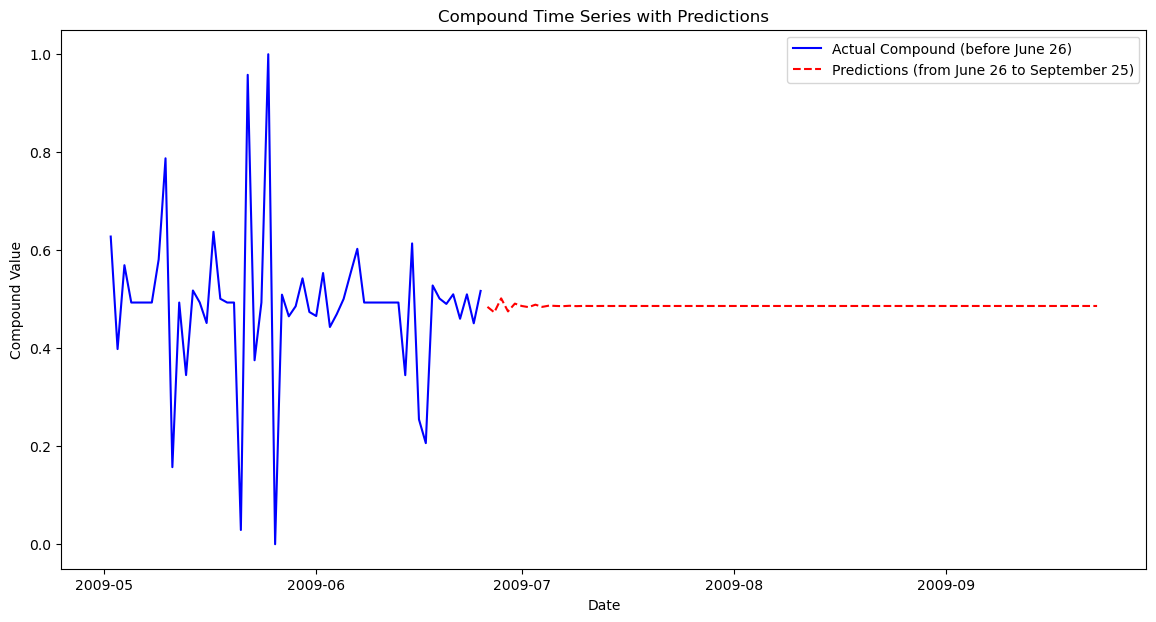

In [365]:

df_diff_scaled2['date'] = pd.to_datetime(df_diff_scaled2['date'])

prediction_dates = pd.date_range(start='2009-06-26', end='2009-09-23', freq='D')


df_before = df_diff_scaled2[df_diff_scaled2['date'] < '2009-06-26']
df_after = df_diff_scaled2[df_diff_scaled2['date'] >= '2009-06-26']


plt.figure(figsize=(14, 7))


plt.plot(df_before['date'], df_before['compound'], label='Actual Compound (before June 26)', color='blue')


plt.plot(prediction_dates, actual_predictions, label='Predictions (from June 26 to September 25)', color='red', linestyle='--')

plt.title('Compound Time Series with Predictions')
plt.xlabel('Date')
plt.ylabel('Compound Value')
plt.legend()
plt.show()


# NN model

In [366]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np


2023-11-15 00:29:58.383701: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [544]:
df_concatenato2.head()

0    1.241136e+09
1    1.241222e+09
2    1.241309e+09
3    1.241395e+09
4    1.241482e+09
Name: solo_data, dtype: float64

In [545]:
df_concatenato.reset_index(inplace=True)

In [546]:
df_concatenato2 = df_concatenato['solo_data'].apply(lambda x: x.timestamp())  # Converte i timestamp in valori numerici


In [547]:
data = df_concatenato2.to_numpy().reshape(-1, 1)


In [548]:
from sklearn.preprocessing import MinMaxScaler

# Crea uno scaler
scaler = MinMaxScaler()

# Normalizza i dati
data = scaler.fit_transform(data)

# Ora data_normalized contiene i dati normalizzati


In [549]:

# 80% of the data is the training set
train_data_len = int(np.ceil(len(data) * 0.8))

# training data set
train_data = data[0:train_data_len, :]


x_train = []
y_train = []


In [550]:
# We're using 40 days of past data to predict the future value
past_days = 40
for i in range(past_days, len(train_data)):
    x_train.append(train_data[i-past_days:i, 0])
    y_train.append(train_data[i, 0])

In [551]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [552]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=35))
model.add(Dense(units=1))

In [553]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



In [554]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)



5/5 [==============================] - 3s 15ms/step - loss: 0.4401


In [555]:
# Test data set
test_data = data[train_data_len - past_days:, :]

In [556]:
# Create the x_test and y_test data sets
x_test = []
y_test = data[train_data_len:, :]
for i in range(past_days, len(test_data)):
    x_test.append(test_data[i-past_days:i, 0])


In [557]:
# Convert x_test to a numpy array
x_test = np.array(x_test)

In [558]:
# Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [559]:
# Getting the models predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


1/1 [==============================] - 1s 586ms/step


In [560]:
# Calculate RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))


In [561]:
rmse

1243219787.2128081

In [562]:
last_40_days = train_data[-past_days:]
last_40_days_scaled = scaler.transform(last_40_days)


In [563]:
X_test = []

# Append the last 40 days
X_test.append(last_40_days_scaled)

In [564]:
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [565]:
forecast_period = [7, 30, 90]
forecast = {}

In [566]:
for days in forecast_period:
    predictions = []
    curr_batch = X_test[-1]  # Get the last batch
    for i in range(days):
        # Predict one day and append to the batch
        pred = model.predict(curr_batch.reshape(1, curr_batch.shape[0], 1))
        predictions.append(pred[0])
        curr_batch = np.append(curr_batch[1:], pred[0]).reshape(curr_batch.shape[0], 1)
        
    # Invert the transformations to get the actual values
    actual_predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 0s 18ms/step


In [567]:
actual_predictions = actual_predictions.flatten()


In [568]:
type(actual_predictions)

numpy.ndarray

In [479]:
prediction_dates = pd.date_range(start='2009-06-26', end='2009-09-23', freq='D')

In [480]:
len(actual_predictions)

90

In [481]:
len(prediction_dates)

90

In [571]:
df_concatenato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      56 non-null     int64         
 1   solo_data  56 non-null     datetime64[ns]
 2   compound   56 non-null     float64       
 3   day_num    56 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.9 KB


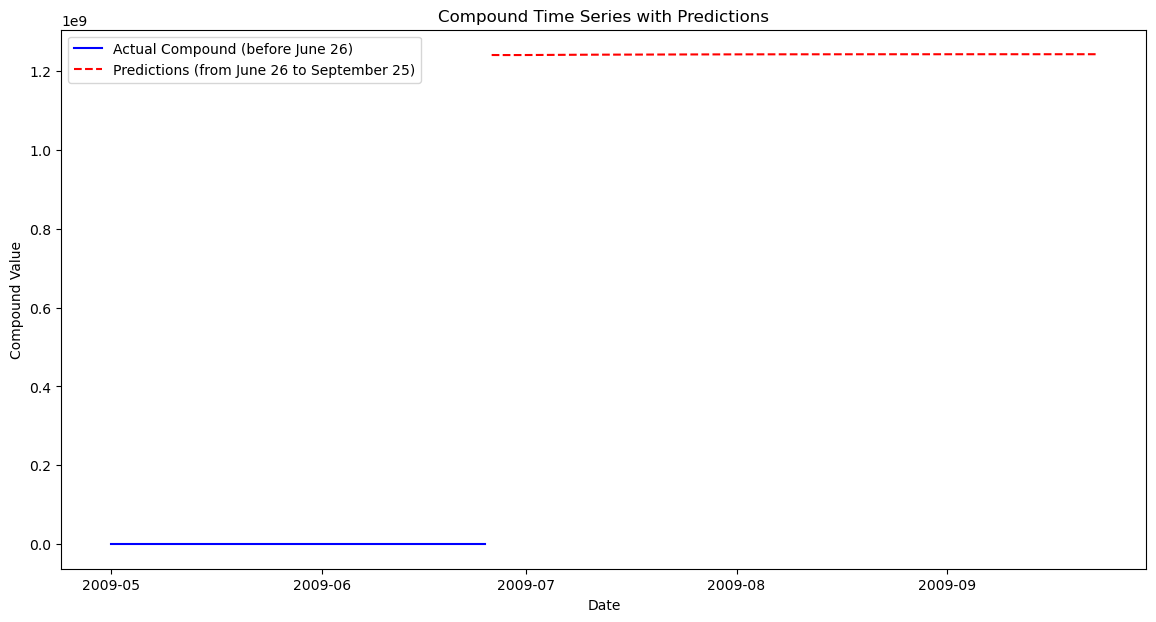

In [578]:


prediction_dates = pd.date_range(start='2009-06-26', end='2009-09-23', freq='D')


df_before = df_concatenato[df_concatenato['solo_data'] < '2009-06-26']
df_after = df_concatenato[df_concatenato['solo_data'] >= '2009-06-26']


plt.figure(figsize=(14, 7))


plt.plot(df_before['solo_data'], df_before['compound'], label='Actual Compound (before June 26)', color='blue')


plt.plot(prediction_dates, actual_predictions, label='Predictions (from June 26 to September 25)', color='red', linestyle='--')

plt.title('Compound Time Series with Predictions')
plt.xlabel('Date')
plt.ylabel('Compound Value')
plt.legend()
plt.show()


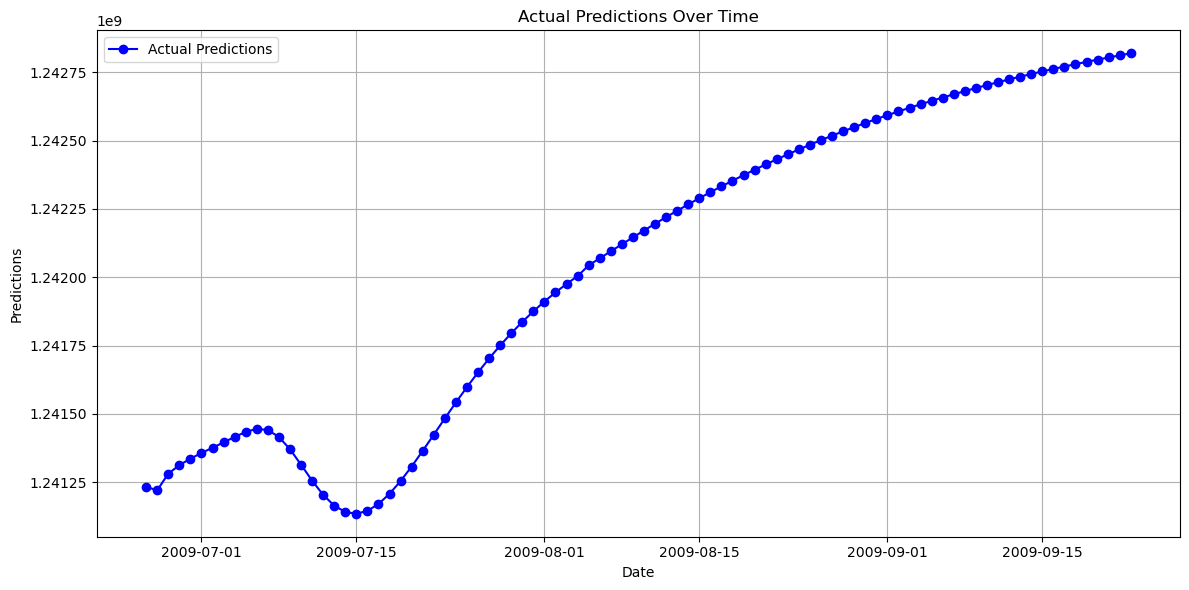

In [542]:
prediction_dates = pd.date_range(start='2009-06-26', end='2009-09-23', freq='D')

plt.figure(figsize=(12, 6))

plt.plot(prediction_dates, actual_predictions, label='Actual Predictions', color='blue', marker='o')


plt.xlabel('Date')
plt.ylabel('Predictions')
plt.title('Actual Predictions Over Time')


plt.legend()


plt.grid(True)
plt.tight_layout()
plt.show()


# Exponential Smoothing

In [508]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm

In [511]:
train_size = int(len(df_concatenato) * 0.8)
train_data = df_concatenato[:train_size]
test_data = df_concatenato[train_size:]

In [516]:
df_concatenato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  56 non-null     datetime64[ns]
 1   compound   56 non-null     float64       
 2   day_num    56 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.4 KB


In [513]:
model = ExponentialSmoothing(train_data['compound'], seasonal='add', seasonal_periods=7)  # Aggiungi un componente stagionale con periodo 7 giorni
model_fit = model.fit()

In [514]:
predictions = model_fit.forecast(len(test_data))



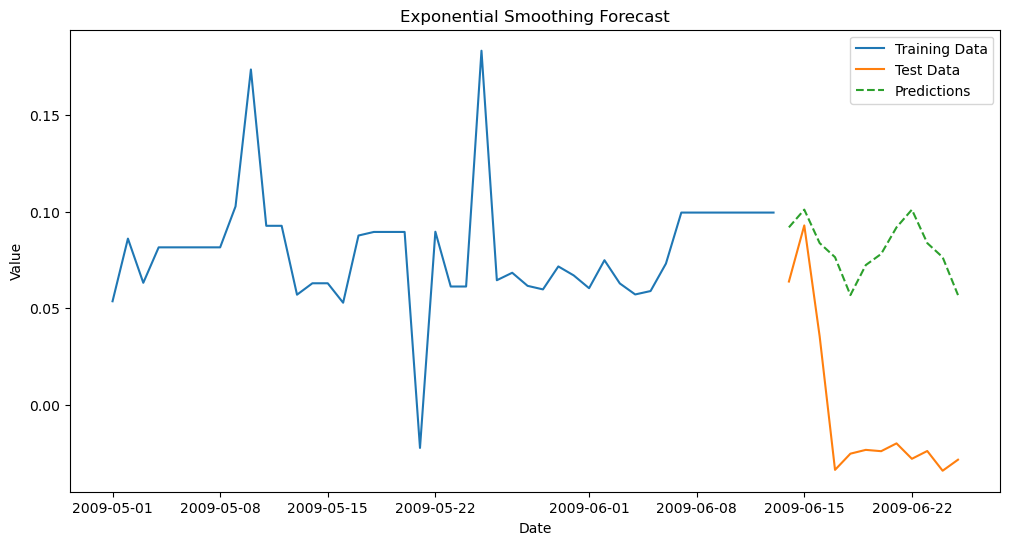

In [518]:
# Visualizza i risultati
plt.figure(figsize=(12, 6))
plt.plot(train_data['solo_data'], train_data['compound'], label='Training Data')
plt.plot(test_data['solo_data'], test_data['compound'], label='Test Data')
plt.plot(test_data['solo_data'], predictions, label='Predictions', linestyle='--')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [573]:
model = ExponentialSmoothing(df_concatenato['compound'], seasonal='add', seasonal_periods=7) 
model_fit = model.fit()

In [574]:
predictions = model_fit.forecast(90)

In [575]:
predictions= predictions.values

In [576]:
len(predictions)

90

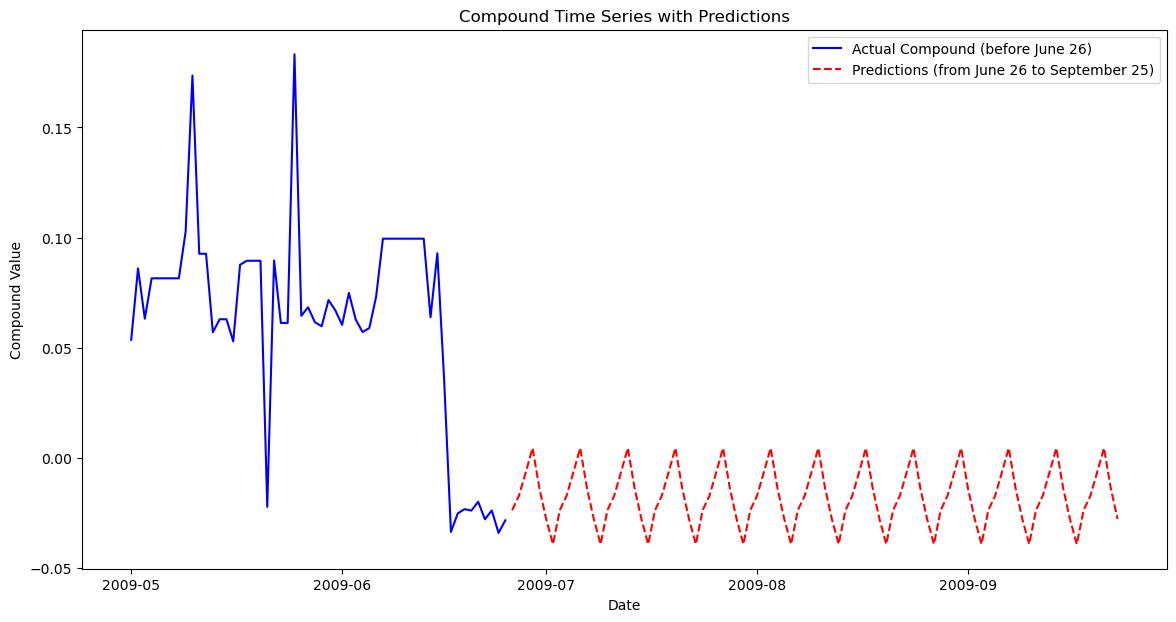

In [577]:

df_concatenato['solo_data'] = pd.to_datetime(df_concatenato['solo_data'])

prediction_dates = pd.date_range(start='2009-06-26', end='2009-09-23', freq='D')


df_before = df_concatenato[df_concatenato['solo_data'] < '2009-06-26']
df_after = df_concatenato[df_concatenato['solo_data'] >= '2009-06-26']


plt.figure(figsize=(14, 7))


plt.plot(df_before['solo_data'], df_before['compound'], label='Actual Compound (before June 26)', color='blue')


plt.plot(prediction_dates, predictions, label='Predictions (from June 26 to September 25)', color='red', linestyle='--')

plt.title('Compound Time Series with Predictions')
plt.xlabel('Date')
plt.ylabel('Compound Value')
plt.legend()
plt.show()


# Dashboard

In [141]:
df = df_concatenato.reset_index()

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      56 non-null     int64         
 1   solo_data  56 non-null     datetime64[ns]
 2   compound   56 non-null     float64       
 3   day_num    56 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.9 KB


In [161]:
def predict_with_arima(df_concatenato, start_date, end_date):
    
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # num days for prediction
    forecast_period = (end_date - df_concatenato['solo_data'].max()).days
    if forecast_period <= 0:
        return df_concatenato  

    
    p_values = range(0, 3)
    d_values = range(0, 3)
    q_values = range(0, 3)

    # grid search
    grid_search = auto_arima(df_concatenato['compound'], 
                         start_p=min(p_values),
                         start_d=min(d_values),
                         start_q=min(q_values),
                         max_p=max(p_values),
                         max_d=max(d_values),
                         max_q=max(q_values),
                         seasonal=False,
                         stepwise=True,
                         suppress_warnings=True,
                         error_action="ignore",
                         trace=True)
    
    
    p, d, q = grid_search.order
    
    model = ARIMA(df_concatenato['compound'], order=(p, d, q))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=forecast_period)

    
    future_dates = [train_set['solo_data'].max() + timedelta(days=x) for x in range(1, forecast_period + 1)]
    forecast_df = pd.DataFrame({
        'solo_data': future_dates,
        'compound': forecast
    })

    
    train_set = pd.concat([train_set, forecast_df], ignore_index=True)
    return train_set